# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [8]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

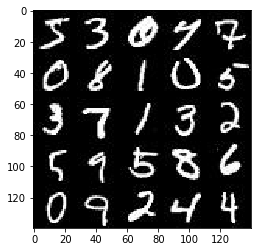

In [17]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
import numpy as np
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

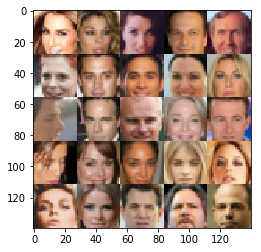

In [18]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


/Users/kelvin/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel/__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [20]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name = "input_real" )
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name = "input_z" )
    learning_rate = tf.placeholder(tf.float32, (), name = "learn_rate" )
    
    return (inputs_real, inputs_z, learning_rate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [21]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.1
    with tf.variable_scope('discriminator', reuse=reuse):
            
        # Input 
        #    Num  28x28
        #    Face 28x28x3
        
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
      
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = True)
        x2 = tf.maximum(alpha * x2, x2)
      
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = True)
        x3 = tf.maximum(alpha * x3, x3)
      
        flat = tf.reshape(x3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1, activation=None)
        out = tf.sigmoid(logits)
        
    return (out, logits)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [22]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
        
    alpha = 0.1
    with tf.variable_scope('generator', reuse=not is_train):
    
        #x1 = tf.layers.dense(z, 7*7*512)
        #x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.dense(z, 7*7*64)
        x1 = tf.reshape(x1, (-1, 7, 7, 64))
        x1 = tf.maximum(alpha * x1, x1)
                
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training = is_train)
        x2 = tf.maximum(alpha * x2, x2) 
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training = is_train)
        x3 = tf.maximum(alpha * x3, x3) 
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 3, strides=1, padding='same')
        out = tf.tanh(logits)
        
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [23]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_output = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_output, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)  * np.random.uniform(0.7, 1.2)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [24]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
   
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [25]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [26]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    show_every = 100  #100
    print_every = 10  #100
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                
                # sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images*2, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})

                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{} ...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f} ...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2 ... Discriminator Loss: 0.6703 ... Generator Loss: 3.9890
Epoch 0/2 ... Discriminator Loss: 0.7686 ... Generator Loss: 3.1866
Epoch 0/2 ... Discriminator Loss: 0.8074 ... Generator Loss: 4.3188
Epoch 0/2 ... Discriminator Loss: 2.2863 ... Generator Loss: 6.4314
Epoch 0/2 ... Discriminator Loss: 0.9972 ... Generator Loss: 2.1714
Epoch 0/2 ... Discriminator Loss: 1.4609 ... Generator Loss: 2.9995
Epoch 0/2 ... Discriminator Loss: 1.2272 ... Generator Loss: 0.9589
Epoch 0/2 ... Discriminator Loss: 1.0264 ... Generator Loss: 1.5315
Epoch 0/2 ... Discriminator Loss: 1.1281 ... Generator Loss: 1.1485
Epoch 0/2 ... Discriminator Loss: 1.0442 ... Generator Loss: 1.3630


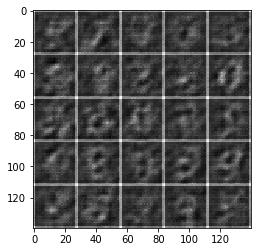

Epoch 0/2 ... Discriminator Loss: 1.0406 ... Generator Loss: 2.0512
Epoch 0/2 ... Discriminator Loss: 1.0818 ... Generator Loss: 1.3152
Epoch 0/2 ... Discriminator Loss: 0.9588 ... Generator Loss: 2.2149
Epoch 0/2 ... Discriminator Loss: 1.1175 ... Generator Loss: 2.1918
Epoch 0/2 ... Discriminator Loss: 0.9964 ... Generator Loss: 1.5254
Epoch 0/2 ... Discriminator Loss: 1.0319 ... Generator Loss: 1.2945
Epoch 0/2 ... Discriminator Loss: 0.8995 ... Generator Loss: 1.9596
Epoch 0/2 ... Discriminator Loss: 0.9576 ... Generator Loss: 1.9817
Epoch 0/2 ... Discriminator Loss: 0.9218 ... Generator Loss: 1.6188
Epoch 0/2 ... Discriminator Loss: 0.8670 ... Generator Loss: 2.2840


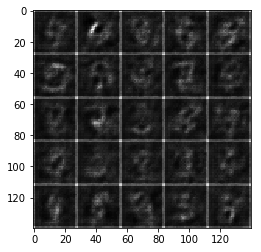

Epoch 0/2 ... Discriminator Loss: 0.9417 ... Generator Loss: 2.3367
Epoch 0/2 ... Discriminator Loss: 0.8991 ... Generator Loss: 1.8380
Epoch 0/2 ... Discriminator Loss: 0.9856 ... Generator Loss: 1.3190
Epoch 0/2 ... Discriminator Loss: 1.0519 ... Generator Loss: 1.2182
Epoch 0/2 ... Discriminator Loss: 0.7989 ... Generator Loss: 2.6801
Epoch 0/2 ... Discriminator Loss: 0.8266 ... Generator Loss: 2.0843
Epoch 0/2 ... Discriminator Loss: 0.8242 ... Generator Loss: 2.2667
Epoch 0/2 ... Discriminator Loss: 0.9866 ... Generator Loss: 1.4111
Epoch 0/2 ... Discriminator Loss: 0.9772 ... Generator Loss: 1.3624
Epoch 0/2 ... Discriminator Loss: 0.8932 ... Generator Loss: 2.7667


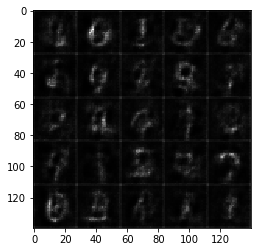

Epoch 0/2 ... Discriminator Loss: 0.9162 ... Generator Loss: 2.6578
Epoch 0/2 ... Discriminator Loss: 0.9382 ... Generator Loss: 2.5595
Epoch 0/2 ... Discriminator Loss: 0.7989 ... Generator Loss: 2.4508
Epoch 0/2 ... Discriminator Loss: 0.8221 ... Generator Loss: 2.0079
Epoch 0/2 ... Discriminator Loss: 1.0316 ... Generator Loss: 3.0337
Epoch 0/2 ... Discriminator Loss: 0.8890 ... Generator Loss: 2.3052
Epoch 0/2 ... Discriminator Loss: 0.8539 ... Generator Loss: 1.9520
Epoch 0/2 ... Discriminator Loss: 0.7981 ... Generator Loss: 2.1018
Epoch 0/2 ... Discriminator Loss: 0.9810 ... Generator Loss: 1.5359
Epoch 0/2 ... Discriminator Loss: 1.1153 ... Generator Loss: 1.1787


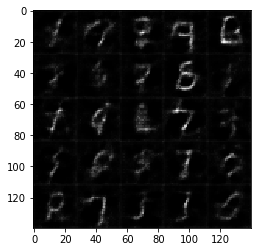

Epoch 0/2 ... Discriminator Loss: 1.0037 ... Generator Loss: 2.7468
Epoch 0/2 ... Discriminator Loss: 0.8970 ... Generator Loss: 1.7541
Epoch 0/2 ... Discriminator Loss: 1.0167 ... Generator Loss: 2.1615
Epoch 0/2 ... Discriminator Loss: 0.9322 ... Generator Loss: 1.6519
Epoch 0/2 ... Discriminator Loss: 0.9017 ... Generator Loss: 2.3942
Epoch 0/2 ... Discriminator Loss: 0.8837 ... Generator Loss: 1.8870
Epoch 0/2 ... Discriminator Loss: 1.0432 ... Generator Loss: 1.2604
Epoch 0/2 ... Discriminator Loss: 0.9250 ... Generator Loss: 1.7329
Epoch 0/2 ... Discriminator Loss: 0.9406 ... Generator Loss: 1.8096
Epoch 0/2 ... Discriminator Loss: 0.9584 ... Generator Loss: 1.6197


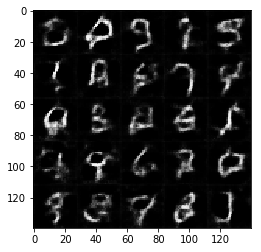

Epoch 0/2 ... Discriminator Loss: 1.1021 ... Generator Loss: 2.3182
Epoch 0/2 ... Discriminator Loss: 0.9881 ... Generator Loss: 1.4262
Epoch 0/2 ... Discriminator Loss: 0.9077 ... Generator Loss: 2.1177
Epoch 0/2 ... Discriminator Loss: 0.9339 ... Generator Loss: 1.5529
Epoch 0/2 ... Discriminator Loss: 0.8627 ... Generator Loss: 1.9364
Epoch 0/2 ... Discriminator Loss: 1.2959 ... Generator Loss: 1.0302
Epoch 0/2 ... Discriminator Loss: 1.0736 ... Generator Loss: 1.1362
Epoch 0/2 ... Discriminator Loss: 0.9370 ... Generator Loss: 1.8487
Epoch 0/2 ... Discriminator Loss: 0.9617 ... Generator Loss: 1.8846
Epoch 0/2 ... Discriminator Loss: 0.9329 ... Generator Loss: 2.2337


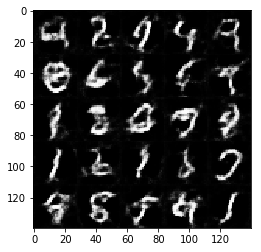

Epoch 0/2 ... Discriminator Loss: 0.9160 ... Generator Loss: 1.6367
Epoch 0/2 ... Discriminator Loss: 0.9170 ... Generator Loss: 2.0643
Epoch 0/2 ... Discriminator Loss: 0.8991 ... Generator Loss: 1.6821
Epoch 0/2 ... Discriminator Loss: 0.8985 ... Generator Loss: 1.8222
Epoch 0/2 ... Discriminator Loss: 0.9332 ... Generator Loss: 1.5706
Epoch 0/2 ... Discriminator Loss: 1.0021 ... Generator Loss: 1.4486
Epoch 0/2 ... Discriminator Loss: 0.9422 ... Generator Loss: 1.9075
Epoch 0/2 ... Discriminator Loss: 1.0212 ... Generator Loss: 1.3772
Epoch 0/2 ... Discriminator Loss: 0.9555 ... Generator Loss: 2.0565
Epoch 0/2 ... Discriminator Loss: 0.9381 ... Generator Loss: 1.8936


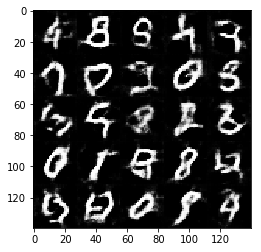

Epoch 0/2 ... Discriminator Loss: 1.0751 ... Generator Loss: 1.3263
Epoch 0/2 ... Discriminator Loss: 0.9438 ... Generator Loss: 1.6515
Epoch 0/2 ... Discriminator Loss: 1.0904 ... Generator Loss: 2.6262
Epoch 0/2 ... Discriminator Loss: 0.8556 ... Generator Loss: 1.9567
Epoch 0/2 ... Discriminator Loss: 0.8533 ... Generator Loss: 2.1321
Epoch 0/2 ... Discriminator Loss: 0.9297 ... Generator Loss: 1.4774
Epoch 0/2 ... Discriminator Loss: 0.8949 ... Generator Loss: 1.8551
Epoch 0/2 ... Discriminator Loss: 1.0871 ... Generator Loss: 1.1510
Epoch 0/2 ... Discriminator Loss: 0.9409 ... Generator Loss: 1.4599
Epoch 0/2 ... Discriminator Loss: 1.0789 ... Generator Loss: 1.1603


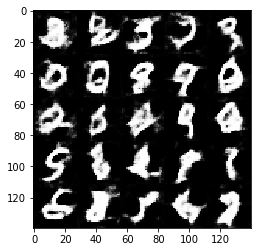

Epoch 0/2 ... Discriminator Loss: 0.9099 ... Generator Loss: 1.7442
Epoch 0/2 ... Discriminator Loss: 0.9450 ... Generator Loss: 1.4850
Epoch 0/2 ... Discriminator Loss: 1.1138 ... Generator Loss: 2.4054
Epoch 0/2 ... Discriminator Loss: 0.8029 ... Generator Loss: 2.1513
Epoch 0/2 ... Discriminator Loss: 0.9458 ... Generator Loss: 2.7265
Epoch 0/2 ... Discriminator Loss: 0.9011 ... Generator Loss: 1.9684
Epoch 0/2 ... Discriminator Loss: 0.9534 ... Generator Loss: 1.5451
Epoch 0/2 ... Discriminator Loss: 1.0165 ... Generator Loss: 1.2269
Epoch 0/2 ... Discriminator Loss: 0.8928 ... Generator Loss: 1.8323
Epoch 0/2 ... Discriminator Loss: 0.8802 ... Generator Loss: 1.8770


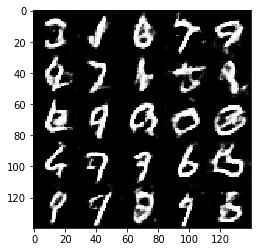

Epoch 0/2 ... Discriminator Loss: 1.1274 ... Generator Loss: 1.0909
Epoch 0/2 ... Discriminator Loss: 0.8534 ... Generator Loss: 2.3304
Epoch 0/2 ... Discriminator Loss: 1.0507 ... Generator Loss: 1.2387
Epoch 1/2 ... Discriminator Loss: 0.8866 ... Generator Loss: 1.7114
Epoch 1/2 ... Discriminator Loss: 0.8922 ... Generator Loss: 1.9753
Epoch 1/2 ... Discriminator Loss: 0.8606 ... Generator Loss: 1.6976
Epoch 1/2 ... Discriminator Loss: 1.0057 ... Generator Loss: 2.1736
Epoch 1/2 ... Discriminator Loss: 0.8575 ... Generator Loss: 1.7822
Epoch 1/2 ... Discriminator Loss: 1.0244 ... Generator Loss: 2.6142
Epoch 1/2 ... Discriminator Loss: 0.8870 ... Generator Loss: 1.8940


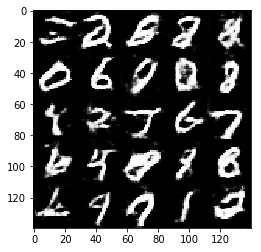

Epoch 1/2 ... Discriminator Loss: 0.8275 ... Generator Loss: 2.0909
Epoch 1/2 ... Discriminator Loss: 0.8658 ... Generator Loss: 1.9685
Epoch 1/2 ... Discriminator Loss: 0.8596 ... Generator Loss: 1.6982
Epoch 1/2 ... Discriminator Loss: 0.8677 ... Generator Loss: 2.0147
Epoch 1/2 ... Discriminator Loss: 0.8470 ... Generator Loss: 2.2631
Epoch 1/2 ... Discriminator Loss: 0.8766 ... Generator Loss: 2.3460
Epoch 1/2 ... Discriminator Loss: 0.9130 ... Generator Loss: 1.5807
Epoch 1/2 ... Discriminator Loss: 0.9932 ... Generator Loss: 1.3866
Epoch 1/2 ... Discriminator Loss: 0.8736 ... Generator Loss: 2.2223
Epoch 1/2 ... Discriminator Loss: 0.9463 ... Generator Loss: 1.4416


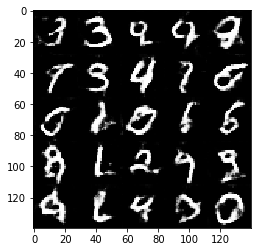

Epoch 1/2 ... Discriminator Loss: 0.9478 ... Generator Loss: 1.5599
Epoch 1/2 ... Discriminator Loss: 0.8590 ... Generator Loss: 2.0202
Epoch 1/2 ... Discriminator Loss: 0.8979 ... Generator Loss: 2.0665
Epoch 1/2 ... Discriminator Loss: 0.8315 ... Generator Loss: 1.8962
Epoch 1/2 ... Discriminator Loss: 0.8501 ... Generator Loss: 1.7721
Epoch 1/2 ... Discriminator Loss: 0.9080 ... Generator Loss: 1.8801
Epoch 1/2 ... Discriminator Loss: 0.9167 ... Generator Loss: 1.5393
Epoch 1/2 ... Discriminator Loss: 1.2393 ... Generator Loss: 0.9856
Epoch 1/2 ... Discriminator Loss: 0.8575 ... Generator Loss: 1.9427
Epoch 1/2 ... Discriminator Loss: 0.8404 ... Generator Loss: 1.7836


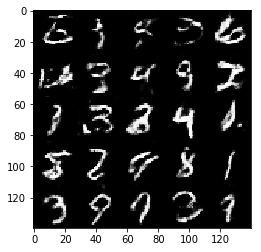

Epoch 1/2 ... Discriminator Loss: 0.8104 ... Generator Loss: 2.5531
Epoch 1/2 ... Discriminator Loss: 0.8907 ... Generator Loss: 2.1116
Epoch 1/2 ... Discriminator Loss: 0.9521 ... Generator Loss: 1.6981
Epoch 1/2 ... Discriminator Loss: 0.9101 ... Generator Loss: 1.5847
Epoch 1/2 ... Discriminator Loss: 1.1013 ... Generator Loss: 2.4982
Epoch 1/2 ... Discriminator Loss: 1.1499 ... Generator Loss: 2.4334
Epoch 1/2 ... Discriminator Loss: 1.0861 ... Generator Loss: 1.1811
Epoch 1/2 ... Discriminator Loss: 1.3278 ... Generator Loss: 0.9321
Epoch 1/2 ... Discriminator Loss: 0.8748 ... Generator Loss: 2.1083
Epoch 1/2 ... Discriminator Loss: 0.9457 ... Generator Loss: 2.3774


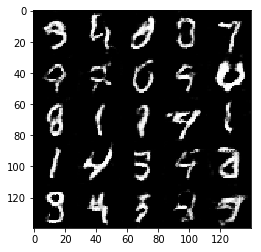

Epoch 1/2 ... Discriminator Loss: 0.8987 ... Generator Loss: 1.7986
Epoch 1/2 ... Discriminator Loss: 0.9725 ... Generator Loss: 2.2419
Epoch 1/2 ... Discriminator Loss: 0.8151 ... Generator Loss: 2.0337
Epoch 1/2 ... Discriminator Loss: 0.8752 ... Generator Loss: 2.1528
Epoch 1/2 ... Discriminator Loss: 1.2223 ... Generator Loss: 1.0693
Epoch 1/2 ... Discriminator Loss: 1.1419 ... Generator Loss: 1.0697
Epoch 1/2 ... Discriminator Loss: 0.9002 ... Generator Loss: 2.1311
Epoch 1/2 ... Discriminator Loss: 0.8778 ... Generator Loss: 2.1857
Epoch 1/2 ... Discriminator Loss: 0.8645 ... Generator Loss: 2.1058
Epoch 1/2 ... Discriminator Loss: 0.8888 ... Generator Loss: 1.8405


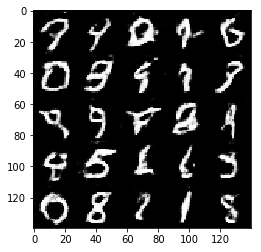

Epoch 1/2 ... Discriminator Loss: 0.9177 ... Generator Loss: 1.6975
Epoch 1/2 ... Discriminator Loss: 0.9069 ... Generator Loss: 1.6110
Epoch 1/2 ... Discriminator Loss: 1.0173 ... Generator Loss: 1.2687
Epoch 1/2 ... Discriminator Loss: 0.8421 ... Generator Loss: 2.0302
Epoch 1/2 ... Discriminator Loss: 0.9489 ... Generator Loss: 2.0348
Epoch 1/2 ... Discriminator Loss: 0.9363 ... Generator Loss: 2.0857
Epoch 1/2 ... Discriminator Loss: 0.8731 ... Generator Loss: 1.6789
Epoch 1/2 ... Discriminator Loss: 0.8938 ... Generator Loss: 1.6878
Epoch 1/2 ... Discriminator Loss: 0.8727 ... Generator Loss: 1.9280
Epoch 1/2 ... Discriminator Loss: 0.8217 ... Generator Loss: 2.0539


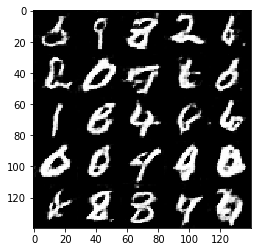

Epoch 1/2 ... Discriminator Loss: 0.9110 ... Generator Loss: 1.5321
Epoch 1/2 ... Discriminator Loss: 0.8612 ... Generator Loss: 1.6912
Epoch 1/2 ... Discriminator Loss: 0.8163 ... Generator Loss: 2.2415
Epoch 1/2 ... Discriminator Loss: 0.8239 ... Generator Loss: 2.1971
Epoch 1/2 ... Discriminator Loss: 0.8862 ... Generator Loss: 1.7165
Epoch 1/2 ... Discriminator Loss: 0.9272 ... Generator Loss: 2.2432
Epoch 1/2 ... Discriminator Loss: 1.0068 ... Generator Loss: 1.3330
Epoch 1/2 ... Discriminator Loss: 0.8650 ... Generator Loss: 1.7045
Epoch 1/2 ... Discriminator Loss: 1.1398 ... Generator Loss: 1.0817
Epoch 1/2 ... Discriminator Loss: 0.9058 ... Generator Loss: 1.6152


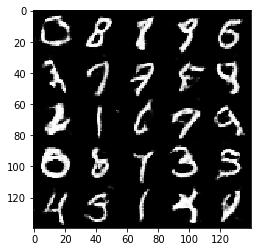

Epoch 1/2 ... Discriminator Loss: 1.9831 ... Generator Loss: 2.9868
Epoch 1/2 ... Discriminator Loss: 0.9813 ... Generator Loss: 1.3398
Epoch 1/2 ... Discriminator Loss: 0.9664 ... Generator Loss: 1.4370
Epoch 1/2 ... Discriminator Loss: 0.8851 ... Generator Loss: 1.8412
Epoch 1/2 ... Discriminator Loss: 0.8407 ... Generator Loss: 1.9092
Epoch 1/2 ... Discriminator Loss: 0.9392 ... Generator Loss: 1.4439
Epoch 1/2 ... Discriminator Loss: 0.8711 ... Generator Loss: 2.0589
Epoch 1/2 ... Discriminator Loss: 1.3503 ... Generator Loss: 2.4236
Epoch 1/2 ... Discriminator Loss: 0.9153 ... Generator Loss: 1.6061
Epoch 1/2 ... Discriminator Loss: 1.0311 ... Generator Loss: 1.2125


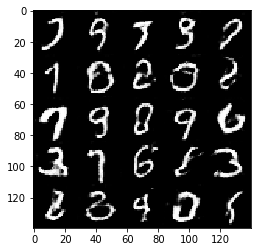

Epoch 1/2 ... Discriminator Loss: 0.9304 ... Generator Loss: 1.4703
Epoch 1/2 ... Discriminator Loss: 1.0420 ... Generator Loss: 1.2350
Epoch 1/2 ... Discriminator Loss: 1.0246 ... Generator Loss: 1.2676
Epoch 1/2 ... Discriminator Loss: 0.9152 ... Generator Loss: 2.0950
Epoch 1/2 ... Discriminator Loss: 0.9656 ... Generator Loss: 2.1509
Epoch 1/2 ... Discriminator Loss: 0.8450 ... Generator Loss: 1.8725
Epoch 1/2 ... Discriminator Loss: 0.9572 ... Generator Loss: 2.4460
Epoch 1/2 ... Discriminator Loss: 1.0138 ... Generator Loss: 1.4944
Epoch 1/2 ... Discriminator Loss: 0.8113 ... Generator Loss: 2.3686
Epoch 1/2 ... Discriminator Loss: 1.1019 ... Generator Loss: 1.2807


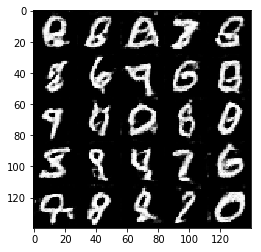

Epoch 1/2 ... Discriminator Loss: 0.9705 ... Generator Loss: 1.6642
Epoch 1/2 ... Discriminator Loss: 1.1153 ... Generator Loss: 1.0650
Epoch 1/2 ... Discriminator Loss: 0.8554 ... Generator Loss: 1.9027
Epoch 1/2 ... Discriminator Loss: 0.8981 ... Generator Loss: 1.7052
Epoch 1/2 ... Discriminator Loss: 0.9893 ... Generator Loss: 1.8417
Epoch 1/2 ... Discriminator Loss: 0.8849 ... Generator Loss: 1.8612
Epoch 1/2 ... Discriminator Loss: 0.8550 ... Generator Loss: 1.7606


In [27]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002 #0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1 ... Discriminator Loss: 0.7318 ... Generator Loss: 3.7555
Epoch 0/1 ... Discriminator Loss: 0.9989 ... Generator Loss: 1.7207
Epoch 0/1 ... Discriminator Loss: 0.6715 ... Generator Loss: 3.2290
Epoch 0/1 ... Discriminator Loss: 0.6944 ... Generator Loss: 2.5578
Epoch 0/1 ... Discriminator Loss: 1.0214 ... Generator Loss: 1.5169
Epoch 0/1 ... Discriminator Loss: 0.7635 ... Generator Loss: 2.6756
Epoch 0/1 ... Discriminator Loss: 1.1498 ... Generator Loss: 3.8024
Epoch 0/1 ... Discriminator Loss: 0.7921 ... Generator Loss: 2.3384
Epoch 0/1 ... Discriminator Loss: 0.8229 ... Generator Loss: 2.9398
Epoch 0/1 ... Discriminator Loss: 0.7589 ... Generator Loss: 2.3872


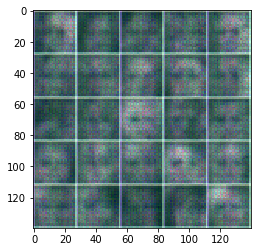

Epoch 0/1 ... Discriminator Loss: 0.8625 ... Generator Loss: 1.7335
Epoch 0/1 ... Discriminator Loss: 0.8920 ... Generator Loss: 2.9300
Epoch 0/1 ... Discriminator Loss: 0.7967 ... Generator Loss: 2.2326
Epoch 0/1 ... Discriminator Loss: 1.5644 ... Generator Loss: 0.6647
Epoch 0/1 ... Discriminator Loss: 0.7776 ... Generator Loss: 2.1101
Epoch 0/1 ... Discriminator Loss: 0.9671 ... Generator Loss: 1.4043
Epoch 0/1 ... Discriminator Loss: 1.2898 ... Generator Loss: 0.8134
Epoch 0/1 ... Discriminator Loss: 0.7865 ... Generator Loss: 1.9097
Epoch 0/1 ... Discriminator Loss: 0.7389 ... Generator Loss: 3.6528
Epoch 0/1 ... Discriminator Loss: 0.6766 ... Generator Loss: 3.5216


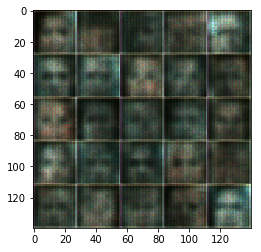

Epoch 0/1 ... Discriminator Loss: 0.9527 ... Generator Loss: 1.3808
Epoch 0/1 ... Discriminator Loss: 0.6570 ... Generator Loss: 3.1766
Epoch 0/1 ... Discriminator Loss: 0.8317 ... Generator Loss: 1.8238
Epoch 0/1 ... Discriminator Loss: 0.8809 ... Generator Loss: 1.6717
Epoch 0/1 ... Discriminator Loss: 0.7223 ... Generator Loss: 2.4506
Epoch 0/1 ... Discriminator Loss: 0.8771 ... Generator Loss: 4.3610
Epoch 0/1 ... Discriminator Loss: 0.8663 ... Generator Loss: 1.6347
Epoch 0/1 ... Discriminator Loss: 0.6452 ... Generator Loss: 3.2164
Epoch 0/1 ... Discriminator Loss: 0.6785 ... Generator Loss: 2.7417
Epoch 0/1 ... Discriminator Loss: 0.7539 ... Generator Loss: 2.1186


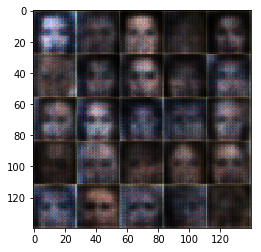

Epoch 0/1 ... Discriminator Loss: 1.4571 ... Generator Loss: 0.8090
Epoch 0/1 ... Discriminator Loss: 0.6769 ... Generator Loss: 3.1522
Epoch 0/1 ... Discriminator Loss: 0.9074 ... Generator Loss: 1.8492
Epoch 0/1 ... Discriminator Loss: 1.4622 ... Generator Loss: 0.7678
Epoch 0/1 ... Discriminator Loss: 1.5440 ... Generator Loss: 0.6172
Epoch 0/1 ... Discriminator Loss: 0.9070 ... Generator Loss: 1.6174
Epoch 0/1 ... Discriminator Loss: 0.9090 ... Generator Loss: 3.2303
Epoch 0/1 ... Discriminator Loss: 0.9110 ... Generator Loss: 1.5226
Epoch 0/1 ... Discriminator Loss: 0.8204 ... Generator Loss: 2.3805
Epoch 0/1 ... Discriminator Loss: 0.9543 ... Generator Loss: 1.3919


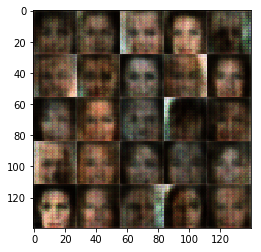

Epoch 0/1 ... Discriminator Loss: 0.6516 ... Generator Loss: 3.5423
Epoch 0/1 ... Discriminator Loss: 0.6657 ... Generator Loss: 4.4455
Epoch 0/1 ... Discriminator Loss: 0.7261 ... Generator Loss: 2.3994
Epoch 0/1 ... Discriminator Loss: 1.5790 ... Generator Loss: 0.7296
Epoch 0/1 ... Discriminator Loss: 0.8033 ... Generator Loss: 1.9458
Epoch 0/1 ... Discriminator Loss: 0.9151 ... Generator Loss: 4.3993
Epoch 0/1 ... Discriminator Loss: 0.9395 ... Generator Loss: 1.4827
Epoch 0/1 ... Discriminator Loss: 1.1572 ... Generator Loss: 1.0648
Epoch 0/1 ... Discriminator Loss: 0.6548 ... Generator Loss: 3.1343
Epoch 0/1 ... Discriminator Loss: 0.6538 ... Generator Loss: 6.4014


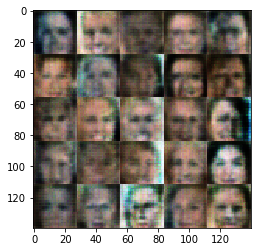

Epoch 0/1 ... Discriminator Loss: 0.7223 ... Generator Loss: 2.3228
Epoch 0/1 ... Discriminator Loss: 0.7763 ... Generator Loss: 2.3792
Epoch 0/1 ... Discriminator Loss: 0.6835 ... Generator Loss: 3.5451
Epoch 0/1 ... Discriminator Loss: 0.8384 ... Generator Loss: 2.2057
Epoch 0/1 ... Discriminator Loss: 0.6128 ... Generator Loss: 4.3941
Epoch 0/1 ... Discriminator Loss: 0.6424 ... Generator Loss: 3.8565
Epoch 0/1 ... Discriminator Loss: 0.7509 ... Generator Loss: 3.4061
Epoch 0/1 ... Discriminator Loss: 1.1287 ... Generator Loss: 1.0347
Epoch 0/1 ... Discriminator Loss: 0.6896 ... Generator Loss: 2.8654
Epoch 0/1 ... Discriminator Loss: 1.0663 ... Generator Loss: 3.5629


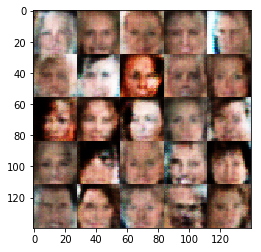

Epoch 0/1 ... Discriminator Loss: 0.7676 ... Generator Loss: 2.2299
Epoch 0/1 ... Discriminator Loss: 0.6385 ... Generator Loss: 4.2826
Epoch 0/1 ... Discriminator Loss: 1.4337 ... Generator Loss: 0.8067
Epoch 0/1 ... Discriminator Loss: 1.2243 ... Generator Loss: 0.8777
Epoch 0/1 ... Discriminator Loss: 0.7121 ... Generator Loss: 2.4368
Epoch 0/1 ... Discriminator Loss: 0.8817 ... Generator Loss: 1.5297
Epoch 0/1 ... Discriminator Loss: 0.8138 ... Generator Loss: 2.1010
Epoch 0/1 ... Discriminator Loss: 0.8416 ... Generator Loss: 2.0032
Epoch 0/1 ... Discriminator Loss: 0.6666 ... Generator Loss: 3.3615
Epoch 0/1 ... Discriminator Loss: 0.9538 ... Generator Loss: 1.6951


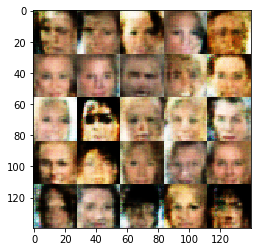

Epoch 0/1 ... Discriminator Loss: 0.7546 ... Generator Loss: 3.4031
Epoch 0/1 ... Discriminator Loss: 0.8504 ... Generator Loss: 2.1604
Epoch 0/1 ... Discriminator Loss: 1.1761 ... Generator Loss: 1.6439
Epoch 0/1 ... Discriminator Loss: 0.6055 ... Generator Loss: 5.6898
Epoch 0/1 ... Discriminator Loss: 1.4195 ... Generator Loss: 0.7595
Epoch 0/1 ... Discriminator Loss: 0.9435 ... Generator Loss: 1.8133
Epoch 0/1 ... Discriminator Loss: 0.7415 ... Generator Loss: 2.0839
Epoch 0/1 ... Discriminator Loss: 1.1512 ... Generator Loss: 1.1980
Epoch 0/1 ... Discriminator Loss: 1.0192 ... Generator Loss: 1.4895
Epoch 0/1 ... Discriminator Loss: 0.7726 ... Generator Loss: 3.1210


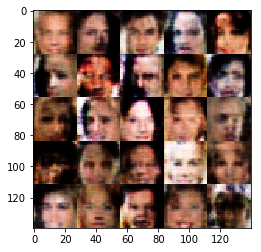

Epoch 0/1 ... Discriminator Loss: 0.6760 ... Generator Loss: 2.8866
Epoch 0/1 ... Discriminator Loss: 0.7615 ... Generator Loss: 2.6574
Epoch 0/1 ... Discriminator Loss: 0.7404 ... Generator Loss: 3.0411
Epoch 0/1 ... Discriminator Loss: 0.8136 ... Generator Loss: 2.3142
Epoch 0/1 ... Discriminator Loss: 1.2589 ... Generator Loss: 0.9214
Epoch 0/1 ... Discriminator Loss: 0.9232 ... Generator Loss: 1.5722
Epoch 0/1 ... Discriminator Loss: 0.6902 ... Generator Loss: 3.8441
Epoch 0/1 ... Discriminator Loss: 1.6623 ... Generator Loss: 0.5597
Epoch 0/1 ... Discriminator Loss: 0.6850 ... Generator Loss: 2.6737
Epoch 0/1 ... Discriminator Loss: 0.8597 ... Generator Loss: 1.8200


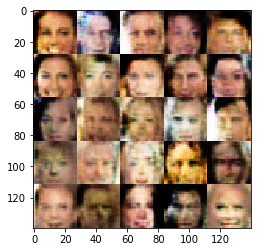

Epoch 0/1 ... Discriminator Loss: 0.9476 ... Generator Loss: 1.4825
Epoch 0/1 ... Discriminator Loss: 0.8987 ... Generator Loss: 1.9082
Epoch 0/1 ... Discriminator Loss: 0.7105 ... Generator Loss: 2.4063
Epoch 0/1 ... Discriminator Loss: 0.6313 ... Generator Loss: 4.0584
Epoch 0/1 ... Discriminator Loss: 0.6634 ... Generator Loss: 4.2874
Epoch 0/1 ... Discriminator Loss: 0.7038 ... Generator Loss: 2.7853
Epoch 0/1 ... Discriminator Loss: 0.8542 ... Generator Loss: 1.5709
Epoch 0/1 ... Discriminator Loss: 0.8128 ... Generator Loss: 2.4621
Epoch 0/1 ... Discriminator Loss: 0.7940 ... Generator Loss: 1.9198
Epoch 0/1 ... Discriminator Loss: 0.8285 ... Generator Loss: 3.5961


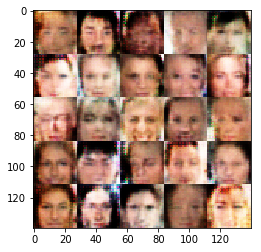

Epoch 0/1 ... Discriminator Loss: 1.0817 ... Generator Loss: 1.4766
Epoch 0/1 ... Discriminator Loss: 0.7065 ... Generator Loss: 4.0369
Epoch 0/1 ... Discriminator Loss: 0.8245 ... Generator Loss: 3.1739
Epoch 0/1 ... Discriminator Loss: 0.6119 ... Generator Loss: 4.1768
Epoch 0/1 ... Discriminator Loss: 0.8826 ... Generator Loss: 1.9167
Epoch 0/1 ... Discriminator Loss: 0.7468 ... Generator Loss: 3.6874
Epoch 0/1 ... Discriminator Loss: 1.4683 ... Generator Loss: 4.5353
Epoch 0/1 ... Discriminator Loss: 0.9297 ... Generator Loss: 1.3376
Epoch 0/1 ... Discriminator Loss: 0.9522 ... Generator Loss: 1.5596
Epoch 0/1 ... Discriminator Loss: 1.0293 ... Generator Loss: 1.2620


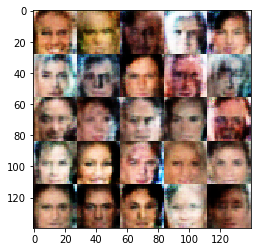

Epoch 0/1 ... Discriminator Loss: 1.1823 ... Generator Loss: 1.0181
Epoch 0/1 ... Discriminator Loss: 0.8249 ... Generator Loss: 2.0273
Epoch 0/1 ... Discriminator Loss: 0.9464 ... Generator Loss: 1.3662
Epoch 0/1 ... Discriminator Loss: 0.8029 ... Generator Loss: 2.8818
Epoch 0/1 ... Discriminator Loss: 1.1042 ... Generator Loss: 1.2991
Epoch 0/1 ... Discriminator Loss: 0.9407 ... Generator Loss: 1.7900
Epoch 0/1 ... Discriminator Loss: 0.6591 ... Generator Loss: 2.9530
Epoch 0/1 ... Discriminator Loss: 0.7258 ... Generator Loss: 3.6720
Epoch 0/1 ... Discriminator Loss: 0.6759 ... Generator Loss: 3.3783
Epoch 0/1 ... Discriminator Loss: 1.1048 ... Generator Loss: 1.1488


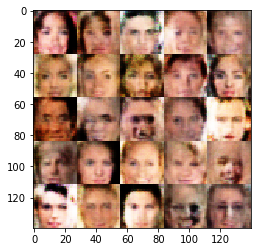

Epoch 0/1 ... Discriminator Loss: 1.0797 ... Generator Loss: 1.5345
Epoch 0/1 ... Discriminator Loss: 1.2409 ... Generator Loss: 1.2492
Epoch 0/1 ... Discriminator Loss: 1.0377 ... Generator Loss: 2.1441
Epoch 0/1 ... Discriminator Loss: 1.0412 ... Generator Loss: 2.0293
Epoch 0/1 ... Discriminator Loss: 0.8109 ... Generator Loss: 2.9763
Epoch 0/1 ... Discriminator Loss: 0.8578 ... Generator Loss: 2.1297
Epoch 0/1 ... Discriminator Loss: 0.9010 ... Generator Loss: 1.7054
Epoch 0/1 ... Discriminator Loss: 1.3965 ... Generator Loss: 0.8585
Epoch 0/1 ... Discriminator Loss: 0.6690 ... Generator Loss: 3.3749
Epoch 0/1 ... Discriminator Loss: 0.6808 ... Generator Loss: 3.7081


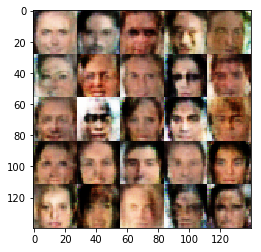

Epoch 0/1 ... Discriminator Loss: 0.9252 ... Generator Loss: 1.9139
Epoch 0/1 ... Discriminator Loss: 0.9017 ... Generator Loss: 2.6708
Epoch 0/1 ... Discriminator Loss: 0.8733 ... Generator Loss: 3.0177
Epoch 0/1 ... Discriminator Loss: 1.2856 ... Generator Loss: 0.9037
Epoch 0/1 ... Discriminator Loss: 1.1811 ... Generator Loss: 1.1323
Epoch 0/1 ... Discriminator Loss: 1.0716 ... Generator Loss: 1.9481
Epoch 0/1 ... Discriminator Loss: 0.7706 ... Generator Loss: 3.6110
Epoch 0/1 ... Discriminator Loss: 2.6455 ... Generator Loss: 0.3089
Epoch 0/1 ... Discriminator Loss: 0.8982 ... Generator Loss: 1.4199
Epoch 0/1 ... Discriminator Loss: 0.9245 ... Generator Loss: 1.4024


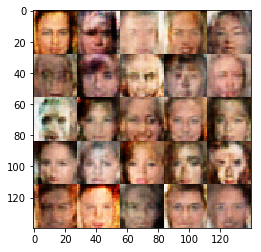

Epoch 0/1 ... Discriminator Loss: 0.8706 ... Generator Loss: 1.6418
Epoch 0/1 ... Discriminator Loss: 1.4301 ... Generator Loss: 0.8452
Epoch 0/1 ... Discriminator Loss: 1.1138 ... Generator Loss: 1.2122
Epoch 0/1 ... Discriminator Loss: 0.9917 ... Generator Loss: 1.8044
Epoch 0/1 ... Discriminator Loss: 0.9021 ... Generator Loss: 1.5756
Epoch 0/1 ... Discriminator Loss: 0.6772 ... Generator Loss: 3.1270
Epoch 0/1 ... Discriminator Loss: 0.7709 ... Generator Loss: 4.4315
Epoch 0/1 ... Discriminator Loss: 1.2940 ... Generator Loss: 1.3219
Epoch 0/1 ... Discriminator Loss: 0.7179 ... Generator Loss: 2.5455
Epoch 0/1 ... Discriminator Loss: 1.8060 ... Generator Loss: 0.6348


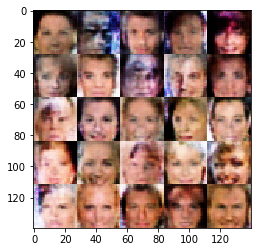

Epoch 0/1 ... Discriminator Loss: 0.8555 ... Generator Loss: 2.4388
Epoch 0/1 ... Discriminator Loss: 0.7570 ... Generator Loss: 5.0372
Epoch 0/1 ... Discriminator Loss: 0.8033 ... Generator Loss: 2.2220
Epoch 0/1 ... Discriminator Loss: 0.7393 ... Generator Loss: 2.6071
Epoch 0/1 ... Discriminator Loss: 0.8935 ... Generator Loss: 2.3672
Epoch 0/1 ... Discriminator Loss: 0.8727 ... Generator Loss: 2.8413
Epoch 0/1 ... Discriminator Loss: 1.0655 ... Generator Loss: 1.6327
Epoch 0/1 ... Discriminator Loss: 0.7969 ... Generator Loss: 2.5357
Epoch 0/1 ... Discriminator Loss: 0.6540 ... Generator Loss: 4.1305
Epoch 0/1 ... Discriminator Loss: 0.6659 ... Generator Loss: 2.9061


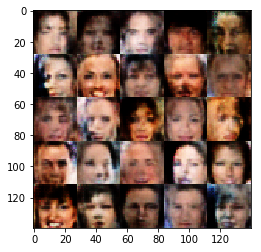

Epoch 0/1 ... Discriminator Loss: 0.7024 ... Generator Loss: 3.3381
Epoch 0/1 ... Discriminator Loss: 1.0919 ... Generator Loss: 1.3630
Epoch 0/1 ... Discriminator Loss: 0.8235 ... Generator Loss: 2.7216
Epoch 0/1 ... Discriminator Loss: 1.4578 ... Generator Loss: 0.9944
Epoch 0/1 ... Discriminator Loss: 0.7248 ... Generator Loss: 4.1322
Epoch 0/1 ... Discriminator Loss: 0.6931 ... Generator Loss: 4.6640
Epoch 0/1 ... Discriminator Loss: 0.8425 ... Generator Loss: 5.2113
Epoch 0/1 ... Discriminator Loss: 1.1104 ... Generator Loss: 1.3575
Epoch 0/1 ... Discriminator Loss: 0.8955 ... Generator Loss: 1.8684
Epoch 0/1 ... Discriminator Loss: 1.2034 ... Generator Loss: 1.0906


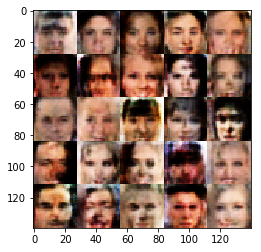

Epoch 0/1 ... Discriminator Loss: 1.4639 ... Generator Loss: 0.9044
Epoch 0/1 ... Discriminator Loss: 0.8751 ... Generator Loss: 1.8721
Epoch 0/1 ... Discriminator Loss: 0.9485 ... Generator Loss: 2.0289
Epoch 0/1 ... Discriminator Loss: 1.1120 ... Generator Loss: 1.3949
Epoch 0/1 ... Discriminator Loss: 1.0378 ... Generator Loss: 1.5476
Epoch 0/1 ... Discriminator Loss: 1.0881 ... Generator Loss: 1.9785
Epoch 0/1 ... Discriminator Loss: 0.8069 ... Generator Loss: 2.1459
Epoch 0/1 ... Discriminator Loss: 0.8771 ... Generator Loss: 2.1157
Epoch 0/1 ... Discriminator Loss: 1.1698 ... Generator Loss: 1.0547
Epoch 0/1 ... Discriminator Loss: 0.8195 ... Generator Loss: 2.2542


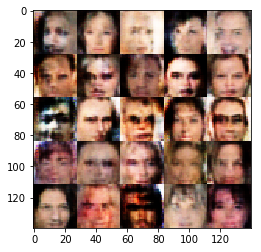

Epoch 0/1 ... Discriminator Loss: 1.0496 ... Generator Loss: 1.9360
Epoch 0/1 ... Discriminator Loss: 0.9883 ... Generator Loss: 2.5265
Epoch 0/1 ... Discriminator Loss: 0.7562 ... Generator Loss: 2.3489
Epoch 0/1 ... Discriminator Loss: 1.0118 ... Generator Loss: 1.3042
Epoch 0/1 ... Discriminator Loss: 1.2117 ... Generator Loss: 1.0190
Epoch 0/1 ... Discriminator Loss: 1.0339 ... Generator Loss: 1.7343
Epoch 0/1 ... Discriminator Loss: 0.8711 ... Generator Loss: 1.7184
Epoch 0/1 ... Discriminator Loss: 0.9837 ... Generator Loss: 1.3003
Epoch 0/1 ... Discriminator Loss: 0.8873 ... Generator Loss: 1.6407
Epoch 0/1 ... Discriminator Loss: 0.9435 ... Generator Loss: 1.4983


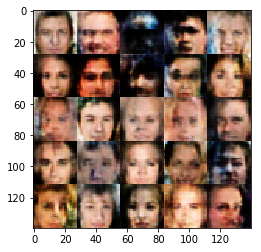

Epoch 0/1 ... Discriminator Loss: 0.9860 ... Generator Loss: 1.9076
Epoch 0/1 ... Discriminator Loss: 0.6950 ... Generator Loss: 2.7499
Epoch 0/1 ... Discriminator Loss: 1.0311 ... Generator Loss: 1.6940
Epoch 0/1 ... Discriminator Loss: 0.8657 ... Generator Loss: 1.6686
Epoch 0/1 ... Discriminator Loss: 0.7013 ... Generator Loss: 2.8416
Epoch 0/1 ... Discriminator Loss: 1.5414 ... Generator Loss: 4.7694
Epoch 0/1 ... Discriminator Loss: 1.0931 ... Generator Loss: 1.4264
Epoch 0/1 ... Discriminator Loss: 0.8069 ... Generator Loss: 2.4344
Epoch 0/1 ... Discriminator Loss: 0.9162 ... Generator Loss: 2.1325
Epoch 0/1 ... Discriminator Loss: 1.2602 ... Generator Loss: 1.3004


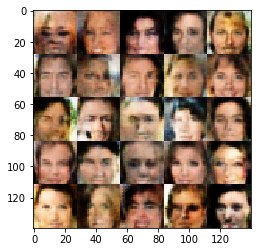

Epoch 0/1 ... Discriminator Loss: 0.8103 ... Generator Loss: 2.2440
Epoch 0/1 ... Discriminator Loss: 0.7882 ... Generator Loss: 3.9503
Epoch 0/1 ... Discriminator Loss: 1.3496 ... Generator Loss: 1.2500
Epoch 0/1 ... Discriminator Loss: 0.7972 ... Generator Loss: 2.3922
Epoch 0/1 ... Discriminator Loss: 0.7899 ... Generator Loss: 3.7052
Epoch 0/1 ... Discriminator Loss: 1.0021 ... Generator Loss: 2.4267
Epoch 0/1 ... Discriminator Loss: 1.3149 ... Generator Loss: 1.4209
Epoch 0/1 ... Discriminator Loss: 0.7884 ... Generator Loss: 2.4079
Epoch 0/1 ... Discriminator Loss: 1.1181 ... Generator Loss: 1.7892
Epoch 0/1 ... Discriminator Loss: 1.0820 ... Generator Loss: 1.7477


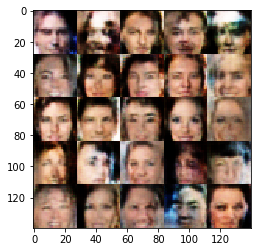

Epoch 0/1 ... Discriminator Loss: 1.0713 ... Generator Loss: 1.9520
Epoch 0/1 ... Discriminator Loss: 1.3299 ... Generator Loss: 1.2812
Epoch 0/1 ... Discriminator Loss: 1.0573 ... Generator Loss: 1.4643
Epoch 0/1 ... Discriminator Loss: 1.3818 ... Generator Loss: 1.2738
Epoch 0/1 ... Discriminator Loss: 0.8440 ... Generator Loss: 2.1304
Epoch 0/1 ... Discriminator Loss: 0.8495 ... Generator Loss: 2.5509
Epoch 0/1 ... Discriminator Loss: 1.0897 ... Generator Loss: 1.7158
Epoch 0/1 ... Discriminator Loss: 0.9175 ... Generator Loss: 3.7230
Epoch 0/1 ... Discriminator Loss: 1.1123 ... Generator Loss: 1.7200
Epoch 0/1 ... Discriminator Loss: 0.6747 ... Generator Loss: 2.6476


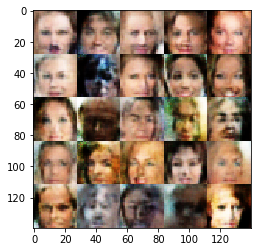

Epoch 0/1 ... Discriminator Loss: 1.2125 ... Generator Loss: 1.7058
Epoch 0/1 ... Discriminator Loss: 0.9156 ... Generator Loss: 3.0566
Epoch 0/1 ... Discriminator Loss: 0.8604 ... Generator Loss: 1.8513
Epoch 0/1 ... Discriminator Loss: 1.0200 ... Generator Loss: 1.6089
Epoch 0/1 ... Discriminator Loss: 0.9124 ... Generator Loss: 3.1669
Epoch 0/1 ... Discriminator Loss: 0.8740 ... Generator Loss: 1.7234
Epoch 0/1 ... Discriminator Loss: 1.3904 ... Generator Loss: 1.1969
Epoch 0/1 ... Discriminator Loss: 0.7607 ... Generator Loss: 3.5865
Epoch 0/1 ... Discriminator Loss: 0.6763 ... Generator Loss: 3.0273
Epoch 0/1 ... Discriminator Loss: 0.8172 ... Generator Loss: 2.9481


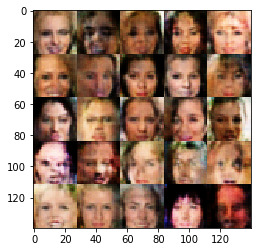

Epoch 0/1 ... Discriminator Loss: 0.7725 ... Generator Loss: 3.6314
Epoch 0/1 ... Discriminator Loss: 1.1834 ... Generator Loss: 1.8960
Epoch 0/1 ... Discriminator Loss: 1.0498 ... Generator Loss: 1.6470
Epoch 0/1 ... Discriminator Loss: 1.0941 ... Generator Loss: 1.5867
Epoch 0/1 ... Discriminator Loss: 0.6921 ... Generator Loss: 3.0005
Epoch 0/1 ... Discriminator Loss: 1.0086 ... Generator Loss: 1.5050
Epoch 0/1 ... Discriminator Loss: 0.8044 ... Generator Loss: 3.3342
Epoch 0/1 ... Discriminator Loss: 0.8385 ... Generator Loss: 3.1276
Epoch 0/1 ... Discriminator Loss: 1.1641 ... Generator Loss: 1.5956
Epoch 0/1 ... Discriminator Loss: 1.1593 ... Generator Loss: 1.7894


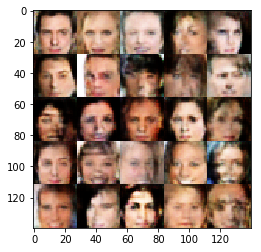

Epoch 0/1 ... Discriminator Loss: 0.7958 ... Generator Loss: 3.6534
Epoch 0/1 ... Discriminator Loss: 0.9416 ... Generator Loss: 1.6647
Epoch 0/1 ... Discriminator Loss: 0.7984 ... Generator Loss: 1.9474
Epoch 0/1 ... Discriminator Loss: 1.0386 ... Generator Loss: 1.6625
Epoch 0/1 ... Discriminator Loss: 1.1933 ... Generator Loss: 1.8270
Epoch 0/1 ... Discriminator Loss: 1.3130 ... Generator Loss: 1.3943
Epoch 0/1 ... Discriminator Loss: 0.7745 ... Generator Loss: 2.6158
Epoch 0/1 ... Discriminator Loss: 1.3259 ... Generator Loss: 1.3179
Epoch 0/1 ... Discriminator Loss: 0.9999 ... Generator Loss: 1.8152
Epoch 0/1 ... Discriminator Loss: 1.0930 ... Generator Loss: 1.4550


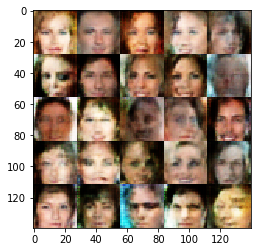

Epoch 0/1 ... Discriminator Loss: 1.7260 ... Generator Loss: 0.8213
Epoch 0/1 ... Discriminator Loss: 1.2690 ... Generator Loss: 1.1390
Epoch 0/1 ... Discriminator Loss: 0.7109 ... Generator Loss: 3.6985
Epoch 0/1 ... Discriminator Loss: 1.1411 ... Generator Loss: 2.1045
Epoch 0/1 ... Discriminator Loss: 0.7772 ... Generator Loss: 2.9814
Epoch 0/1 ... Discriminator Loss: 0.7418 ... Generator Loss: 2.5641
Epoch 0/1 ... Discriminator Loss: 0.9839 ... Generator Loss: 2.5549
Epoch 0/1 ... Discriminator Loss: 1.3203 ... Generator Loss: 1.2940
Epoch 0/1 ... Discriminator Loss: 0.9612 ... Generator Loss: 2.8483
Epoch 0/1 ... Discriminator Loss: 0.7641 ... Generator Loss: 2.3608


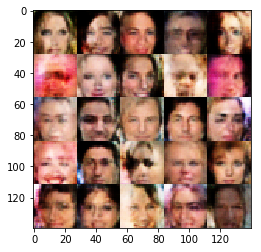

Epoch 0/1 ... Discriminator Loss: 1.0738 ... Generator Loss: 1.9164
Epoch 0/1 ... Discriminator Loss: 1.5189 ... Generator Loss: 1.2111
Epoch 0/1 ... Discriminator Loss: 1.2678 ... Generator Loss: 1.2447
Epoch 0/1 ... Discriminator Loss: 0.7769 ... Generator Loss: 2.2613
Epoch 0/1 ... Discriminator Loss: 0.9877 ... Generator Loss: 2.3003
Epoch 0/1 ... Discriminator Loss: 1.2097 ... Generator Loss: 1.2469
Epoch 0/1 ... Discriminator Loss: 0.9317 ... Generator Loss: 2.1693
Epoch 0/1 ... Discriminator Loss: 1.0880 ... Generator Loss: 2.2059
Epoch 0/1 ... Discriminator Loss: 1.0401 ... Generator Loss: 1.3385
Epoch 0/1 ... Discriminator Loss: 1.0396 ... Generator Loss: 1.9314


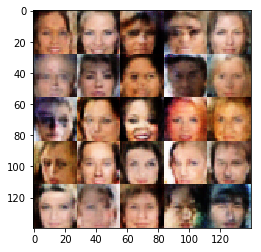

Epoch 0/1 ... Discriminator Loss: 1.1008 ... Generator Loss: 1.8042
Epoch 0/1 ... Discriminator Loss: 1.4294 ... Generator Loss: 1.0701
Epoch 0/1 ... Discriminator Loss: 0.9939 ... Generator Loss: 2.3926
Epoch 0/1 ... Discriminator Loss: 0.7032 ... Generator Loss: 2.9255
Epoch 0/1 ... Discriminator Loss: 1.0323 ... Generator Loss: 2.6537
Epoch 0/1 ... Discriminator Loss: 0.9816 ... Generator Loss: 3.5088
Epoch 0/1 ... Discriminator Loss: 0.9945 ... Generator Loss: 2.3627
Epoch 0/1 ... Discriminator Loss: 1.4571 ... Generator Loss: 1.3505
Epoch 0/1 ... Discriminator Loss: 1.0453 ... Generator Loss: 1.5539
Epoch 0/1 ... Discriminator Loss: 1.2833 ... Generator Loss: 1.5046


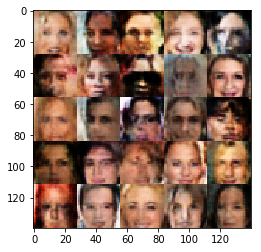

Epoch 0/1 ... Discriminator Loss: 1.3974 ... Generator Loss: 1.0315
Epoch 0/1 ... Discriminator Loss: 0.7056 ... Generator Loss: 4.2150
Epoch 0/1 ... Discriminator Loss: 0.9747 ... Generator Loss: 2.1982
Epoch 0/1 ... Discriminator Loss: 1.0346 ... Generator Loss: 2.9490
Epoch 0/1 ... Discriminator Loss: 1.1953 ... Generator Loss: 1.9748
Epoch 0/1 ... Discriminator Loss: 1.2668 ... Generator Loss: 2.0376
Epoch 0/1 ... Discriminator Loss: 1.3398 ... Generator Loss: 1.1987
Epoch 0/1 ... Discriminator Loss: 0.8975 ... Generator Loss: 1.6961
Epoch 0/1 ... Discriminator Loss: 0.9629 ... Generator Loss: 1.8819
Epoch 0/1 ... Discriminator Loss: 1.3637 ... Generator Loss: 1.1603


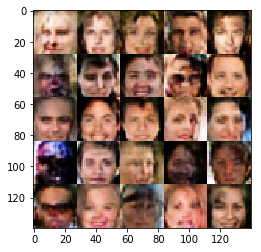

Epoch 0/1 ... Discriminator Loss: 0.9992 ... Generator Loss: 1.7296
Epoch 0/1 ... Discriminator Loss: 1.0048 ... Generator Loss: 2.0708
Epoch 0/1 ... Discriminator Loss: 1.0494 ... Generator Loss: 1.8190
Epoch 0/1 ... Discriminator Loss: 1.0706 ... Generator Loss: 1.9847
Epoch 0/1 ... Discriminator Loss: 1.5725 ... Generator Loss: 1.1366
Epoch 0/1 ... Discriminator Loss: 0.9673 ... Generator Loss: 1.7692
Epoch 0/1 ... Discriminator Loss: 0.7519 ... Generator Loss: 2.8721
Epoch 0/1 ... Discriminator Loss: 1.0541 ... Generator Loss: 2.1150
Epoch 0/1 ... Discriminator Loss: 0.9051 ... Generator Loss: 2.1520
Epoch 0/1 ... Discriminator Loss: 1.0388 ... Generator Loss: 1.4206


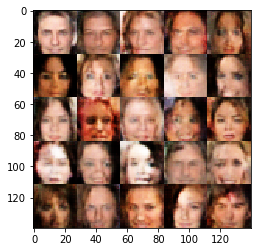

Epoch 0/1 ... Discriminator Loss: 1.4551 ... Generator Loss: 1.0699
Epoch 0/1 ... Discriminator Loss: 1.5459 ... Generator Loss: 0.9422
Epoch 0/1 ... Discriminator Loss: 1.4182 ... Generator Loss: 1.1538
Epoch 0/1 ... Discriminator Loss: 1.4780 ... Generator Loss: 0.9163
Epoch 0/1 ... Discriminator Loss: 0.7641 ... Generator Loss: 3.5954
Epoch 0/1 ... Discriminator Loss: 0.9466 ... Generator Loss: 2.4633
Epoch 0/1 ... Discriminator Loss: 0.9759 ... Generator Loss: 2.1802
Epoch 0/1 ... Discriminator Loss: 1.1918 ... Generator Loss: 2.1214
Epoch 0/1 ... Discriminator Loss: 0.9203 ... Generator Loss: 4.7704
Epoch 0/1 ... Discriminator Loss: 1.3983 ... Generator Loss: 1.3230


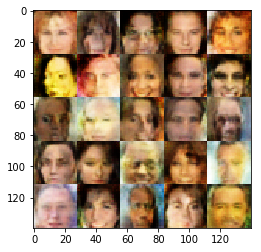

Epoch 0/1 ... Discriminator Loss: 1.4639 ... Generator Loss: 1.3999
Epoch 0/1 ... Discriminator Loss: 1.0001 ... Generator Loss: 2.5268
Epoch 0/1 ... Discriminator Loss: 1.0547 ... Generator Loss: 2.3585
Epoch 0/1 ... Discriminator Loss: 0.9642 ... Generator Loss: 1.3851
Epoch 0/1 ... Discriminator Loss: 1.0113 ... Generator Loss: 1.2654
Epoch 0/1 ... Discriminator Loss: 1.1899 ... Generator Loss: 1.5052


In [28]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002 #0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.